In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('train_file.csv')
data = data.drop(columns='timestamp_milllisecs')

In [7]:
np.unique(data['label'],return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([5443,  364,  364,  364,  364,  350]))

In [8]:
def get_data(train_size=0.8):
    
    split_index = int(train_size*len(data))

    X = data.drop(columns=['label'])
    y = data['label']

    train_data = data[:split_index]
    test_data = data[split_index:]

    x_train, y_train = X[:split_index], y[:split_index]
    x_test, y_test = X[split_index:], y[split_index:]
    
    return x_train, y_train, x_test, y_test

In [9]:
X = data.drop(columns=['label'])
y = data['label']
train_size = 0.8
split_index = int(train_size*len(data))

In [10]:
# train_data = data[:split_index]
# test_data = data[split_index:]

# x_train, y_train = X[:split_index], y[:split_index]
# x_val, y_val = X[split_index:], y[split_index:]

In [11]:
x_train, y_train, x_test, y_test = get_data()

### Default params

In [12]:
x_train, y_train = X[:split_index], y[:split_index]

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

xgb_model = XGBClassifier(random_state=20211027).fit(x_train, y_train)
# preds = xgb_model.predict(x_val)
print(classification_report(y_test, xgb_model.predict(x_test)))

[11:31:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1092
           1       0.63      0.74      0.68        70
           2       0.75      0.71      0.73        70
           3       0.70      0.79      0.74        70
           4       0.81      0.65      0.72        78
           5       0.89      0.57      0.70        70

    accuracy                           0.91      1450
   macro avg       0.79      0.74      0.76      1450
weighted avg       0.91      0.91      0.90      1450



### Predefined search

In [13]:
param_grid = {
    'n_estimators' : [60,70,80,90,100],
    'max_depth' : [1,2,3,4,5,6],
}
estimator = XGBClassifier()

# param_grid = {
#     'n_estimators' : [60,70,80,90,100],
#     'max_features' : [2,3,4,5,6],
#     'random_state' :[20211027]
# }

# estimator = RandomForestClassifier()

ps = PredefinedSplit(test_fold=(split_index, len(data)))
ps = PredefinedSplit(test_fold=(int(len(x_train)*0.8), len(x_train)))
grid_model = GridSearchCV(
    estimator = estimator,
    cv = ps,
    param_grid=param_grid,
    verbose=2
)
grid_model.fit(x_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[11:31:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=1, n_estimators=60; total time=   0.0s
[11:31:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=1, n_estimators=60; total time=   0.0s
[11:31:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ............

[CV] END .......................max_depth=4, n_estimators=70; total time=   0.0s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=4, n_estimators=80; total time=   0.0s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=4, n_estimators=80; total time=   0.0s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[

[CV] END ......................max_depth=6, n_estimators=100; total time=   0.0s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=6, n_estimators=100; total time=   0.0s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=PredefinedSplit(test_fold=array([4639, 5799])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
         

In [14]:
print(classification_report(y_train, grid_model.best_estimator_.predict(x_train)))
print(classification_report(y_test, grid_model.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4351
           1       0.78      0.71      0.74       294
           2       0.79      0.76      0.78       294
           3       0.91      0.56      0.69       294
           4       0.86      0.69      0.77       286
           5       0.81      0.75      0.78       280

    accuracy                           0.91      5799
   macro avg       0.85      0.74      0.78      5799
weighted avg       0.90      0.91      0.90      5799

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1092
           1       0.85      0.56      0.67        70
           2       0.61      0.66      0.63        70
           3       0.77      0.57      0.66        70
           4       0.85      0.58      0.69        78
           5       0.88      0.40      0.55        70

    accuracy                           0.87      1450
   macro avg       0.81

In [15]:
grid_model.best_params_

{'max_depth': 1, 'n_estimators': 60}

## Grid search with cross validation

In [16]:
param_grid = {
    'n_estimators' : [60,70,80,90,100,110,120],
    'max_depth' : [1,2,3,4,5,6],
#     'silent':[True]
}

ps = PredefinedSplit(test_fold=(split_index, len(data)))
ps = PredefinedSplit(test_fold=(4639, len(x_train)))
grid_model = GridSearchCV(
    estimator = XGBClassifier(),
    cv = 5,
    param_grid=param_grid,
    verbose=2
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=1, n_estimators=60; total time=   0.1s
[11:31:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=1, n_estimators=60; total time=   0.1s
[11:31:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ........

[CV] END ......................max_depth=1, n_estimators=100; total time=   0.3s
[11:31:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=1, n_estimators=110; total time=   0.2s
[11:31:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=1, n_estimators=110; total time=   0.2s
[11:31:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END .......................max_depth=2, n_estimators=90; total time=   0.2s
[11:31:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=2, n_estimators=90; total time=   0.2s
[11:31:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=2, n_estimators=90; total time=   0.2s
[11:31:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[11:31:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=3, n_estimators=70; total time=   0.4s
[11:31:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=3, n_estimators=70; total time=   0.6s
[11:31:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=3, n_estimators=70; total time=   0.2

[CV] END ......................max_depth=3, n_estimators=120; total time=   0.4s
[11:31:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=120; total time=   0.4s
[11:31:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=3, n_estimators=120; total time=   0.4s
[11:31:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END ......................max_depth=4, n_estimators=100; total time=   0.6s
[11:31:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.5s
[11:31:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.9s
[11:31:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END .......................max_depth=5, n_estimators=80; total time=   0.4s
[11:32:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=5, n_estimators=80; total time=   0.4s
[11:32:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=5, n_estimators=80; total time=   0.4s
[11:32:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END .......................max_depth=6, n_estimators=60; total time=   0.4s
[11:32:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=6, n_estimators=60; total time=   0.4s
[11:32:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END .......................max_depth=6, n_estimators=60; total time=   0.4s
[11:32:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

[CV] END ......................max_depth=6, n_estimators=110; total time=   0.6s
[11:32:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=6, n_estimators=110; total time=   0.6s
[11:32:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END ......................max_depth=6, n_estimators=110; total time=   0.6s
[11:32:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [17]:
model = grid_model.best_estimator_
print(classification_report(y_train, model.predict(x_train)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4351
           1       1.00      1.00      1.00       294
           2       1.00      1.00      1.00       294
           3       1.00      1.00      1.00       294
           4       1.00      1.00      1.00       286
           5       1.00      1.00      1.00       280

    accuracy                           1.00      5799
   macro avg       1.00      1.00      1.00      5799
weighted avg       1.00      1.00      1.00      5799

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1092
           1       0.64      0.77      0.70        70
           2       0.75      0.70      0.73        70
           3       0.69      0.77      0.73        70
           4       0.80      0.65      0.72        78
           5       0.89      0.57      0.70        70

    accuracy                           0.91      1450
   macro avg       0.79

In [18]:
grid_model.best_params_

{'max_depth': 6, 'n_estimators': 60}

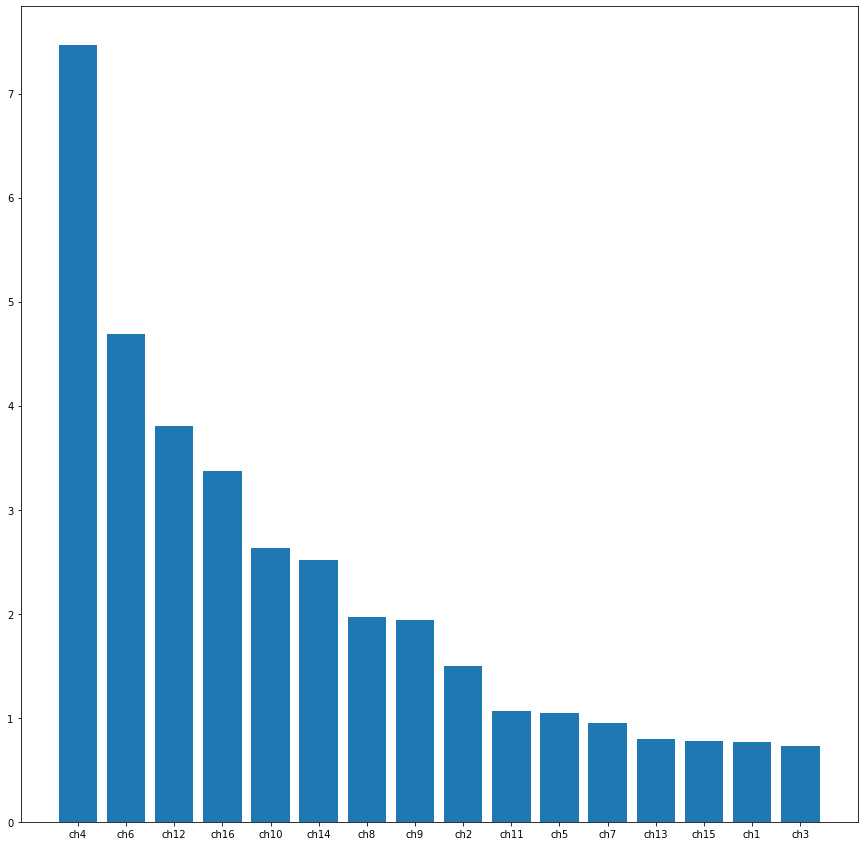

In [19]:
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())


plt.figure(figsize=(15,15))
plt_data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
# importance_data.plot(kind='barh')
plt.bar(plt_data.index, plt_data['score']);

In [20]:
import joblib
joblib.dump(model, 'xgb_experimental.joblib')

['xgb_experimental.joblib']